In [1]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=be94e889f8f06ebf88cad6eb464ebc012c76d44a4e78329088d4541e5240341c
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


#3.1

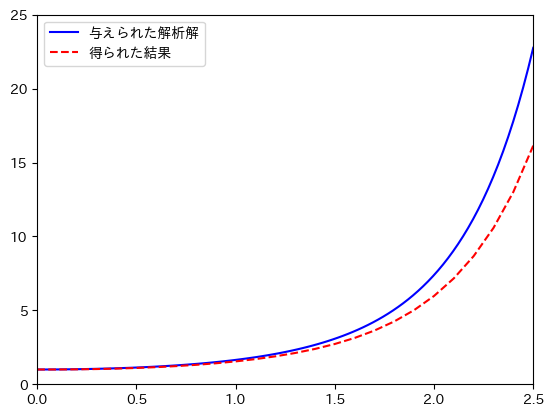

  x | 誤差率 
-------------
0.0 |  0.000% 
0.1 |  0.501% 
0.2 |  1.010% 
0.3 |  1.536% 
0.4 |  2.090% 
0.5 |  2.682% 
0.6 |  3.322% 
0.7 |  4.020% 
0.8 |  4.786% 
0.9 |  5.632% 
1.0 |  6.568% 
1.1 |  7.605% 
1.2 |  8.756% 
1.3 | 10.033% 
1.4 | 11.449% 
1.5 | 13.017% 
1.6 | 14.752% 
1.7 | 16.671% 
1.8 | 18.789% 
1.9 | 21.127% 
2.0 | 23.703% 
2.1 | 26.540% 
2.2 | 29.663% 
2.3 | 33.099% 
2.4 | 36.876% 
2.5 | 41.029% 


In [109]:
#3-1
import numpy as np
import math
import sympy as sym
import matplotlib.pyplot as plt
import japanize_matplotlib

def EulerMethod(x_val, y_val, h, x_max, f, x, y):
    i = 0
    while(True):
        y_val.append(y_val[i] + h * f.subs([(x, x_val[i]), (y, y_val[i])]))
        x_val.append(x_val[i] + h)
        if(x_val[i+1] > x_max):
            break;
        i += 1

def error(est, act): #誤差率を求める関数
    return abs(100 * (est - act) / act)

def main():
    x_val = [0]
    y_val = [1]
    h = 0.1
    x_max = 2.5
    x = sym.symbols("x")
    y = sym.symbols("y")
    f = x * y
    EulerMethod(x_val, y_val, h, x_max, f, x, y)

    expr = sym.exp(x**2 / 2)
    expr_func = sym.lambdify(x, expr, "numpy")
    px = np.linspace(0, x_max, 100)
    py = expr_func(px)
    plt.plot(px, py, color = "blue", label = '与えられた解析解')

    #近似曲線
    plt.plot(x_val, y_val, 'r--', label = '得られた結果')
    plt.xlim(0, x_max)
    plt.ylim(0, 25)
    plt.legend(loc = "upper left")
    plt.show()

    #誤差率
    px = np.linspace(0, x_max, int(x_max/h+1))
    py = expr_func(px)
    print("  x | 誤差率 ")
    print("-------------")
    for i in range(len(py)):
        print(f"{px[i]:.1f}", f"{round(error(py[i], y_val[i]), 3):6.3f}", end = "% \n", sep = " | ")


if __name__ == "__main__":
    main()

#3.2

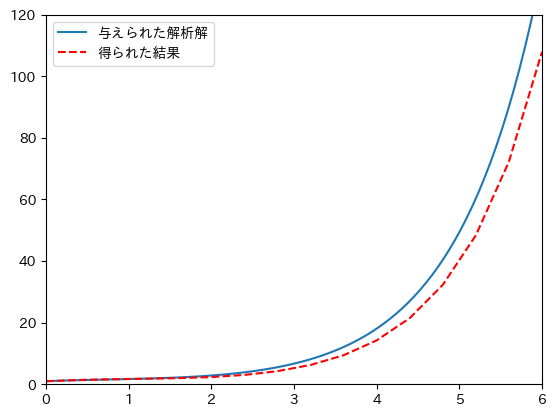

  x | 誤差率 
-------------
0.0 |  0.000% 
0.4 |  4.882% 
0.8 |  3.654% 
1.2 |  2.209% 
1.6 | 11.498% 
2.0 | 21.266% 
2.4 | 27.954% 
2.8 | 30.365% 
3.2 | 29.896% 
3.6 | 28.374% 
4.0 | 26.874% 
4.4 | 25.778% 
4.8 | 25.110% 
5.2 | 24.767% 
5.6 | 24.629% 
6.0 | 24.600% 


In [185]:
#3-2
import numpy as np
import math
import sympy as sym
import matplotlib.pyplot as plt
import japanize_matplotlib

#オイラー法
def EulerMethod(x_val, y_val, z_val, h, x_max, f1, f2, x, y, z):
    i = 0
    while(True):
        y_val.append(y_val[i] + h * f1.subs([(x, x_val[i]), (y, y_val[i]), (z, z_val[i])]))
        z_val.append(z_val[i] + h * f2.subs([(x, x_val[i]), (y, y_val[i]), (z, z_val[i])]))
        x_val.append(x_val[i] + h)
        if(x_val[i+1] > x_max):
            break;
        i += 1

def error(est, act): #誤差率を求める関数
    return abs(100 * (est - act) / act)

def main():
    x_val = [0]
    y_val = [1]
    z_val = [1]
    h = 0.4
    x_max = 6
    x = sym.symbols("x")
    y = sym.symbols("y")
    z = sym.symbols("z")
    f1 = z
    f2 = math.e ** x - y - z
    EulerMethod(x_val, y_val, z_val, h, x_max, f1, f2, x, y, z)

    x2 = np.linspace(0, 7, 100)
    fx = (2/3)*np.exp(-x2/2) * (np.cos(np.sqrt(3)/2*x2) + np.sqrt(3)*np.sin(np.sqrt(3)/2*x2)) + (1/3)*np.exp(x2)

    plt.plot(x2, fx, label = "与えられた解析解")
    plt.xlim(0, 6)
    plt.ylim(0, 120)
    #近似曲線
    plt.plot(x_val, y_val, 'r--', label = '得られた結果')
    plt.legend()
    plt.show()

    #誤差率
    px = np.linspace(0, x_max, int(x_max/h+1))
    py = (2/3)*np.exp(-px/2) * (np.cos(np.sqrt(3)/2*px) + np.sqrt(3)*np.sin(np.sqrt(3)/2*px)) + (1/3)*np.exp(px)
    print("  x | 誤差率 ")
    print("-------------")
    for i in range(len(px)):
        print(f"{px[i]:.1f}", f"{round(error(py[i], y_val[i]), 3):6.3f}", end = "% \n", sep = " | ")

if __name__ == "__main__":
    main()

#3.3

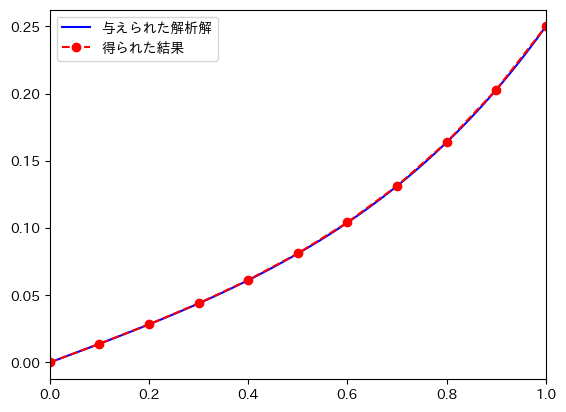

  x | 誤差率 
-------------
0.0 |    nan% 
0.1 |  0.176% 
0.2 |  0.169% 
0.3 |  0.159% 
0.4 |  0.144% 
0.5 |  0.126% 
0.6 |  0.105% 
0.7 |  0.082% 
0.8 |  0.056% 
0.9 |  0.029% 
1.0 |  0.000% 


<ipython-input-184-61a474a16217>:9: RuntimeWarning: invalid value encountered in scalar divide
  return abs(100 * (est - act) / act)


In [184]:
#3-3
import numpy as np
import math
import sympy as sym
import matplotlib.pyplot as plt
import japanize_matplotlib

def error(est, act): #誤差率を求める関数
    return abs(100 * (est - act) / act)

def main():
    y_min = 0
    x_min = 0
    x_max = 1
    y_max = 0.25

    x_val = np.linspace(0, 1, 11)
    y_val = [y_min]

    n = 9
    h = (x_max - x_min) / (n+1) * 2

    y = np.array([1]*n, dtype = 'float')

    C = np.zeros((n, n))
    for i in range(0, n):
        for j in range(0, n):
            if i == j:
                C[j, i] = -2.04
            elif i == j - 1:
                C[j, i] = 1
            elif i == j + 1:
                C[j, i] = 1

    unit = np.identity(n)
    b=np.array([0, 0, 0, 0, 0, 0, 0, 0, -0.25])

    C = np.hstack([C, unit])

    #逆行列法
    for k in range(n):
        Ctmp = C[k][k]
        for j in range(2 * n):
            C[k][j] /= Ctmp #正規化
        for i in range(n):
            if i != k:
                Ctmp = C[i][k]
                for j in range(k, 2 * n):
                    C[i][j] = C[i][j] - C[k][j] * Ctmp

    for i in range(n):
        y[i] = 0
        for j in range(n):
            y[i] = y[i] + C[i][n+j] * b[j]
        y_val.append(y[i])

    y_val.append(y_max)

    x = sym.symbols('x')
    expr = (1/4)*( (sym.exp(2*x)-sym.exp(-2*x)) / (sym.exp(2)-sym.exp(-2)) )
    expr_func = sym.lambdify(x, expr, "numpy")
    px=np.linspace(0, 1, 100)
    py=expr_func(px)
    plt.plot(px, py, color = "blue", label = '与えられた解析解')
    plt.plot(x_val, y_val, 'ro--', label = r'得られた結果')

    plt.xlim(x_min, x_max)

    plt.legend()
    plt.show()

    #誤差率
    py = expr_func(x_val)
    print("  x | 誤差率 ")
    print("-------------")
    for i in range(len(py)):
        print(f"{x_val[i]:.1f}", f"{round(error(py[i], y_val[i]), 3):6.3f}", end = "% \n", sep = " | ")

if __name__ == "__main__":
    main()

#3.4

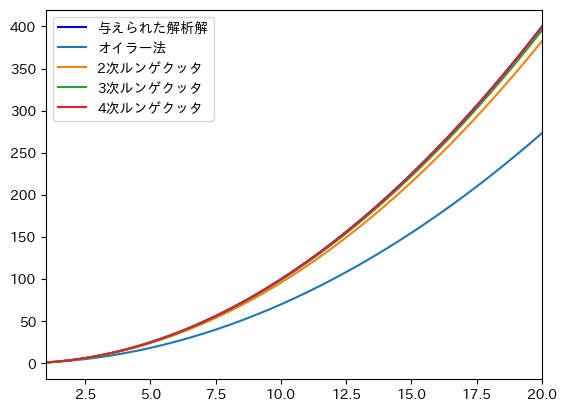

解析解と各アルゴリズムとの局所誤差: 
  x   |    オイラー法   | 2次ルンゲクッタ | 3次ルンゲクッタ | 4次ルンゲクッタ |
-------------------------------------------------------------------------------
1.0   | 0.000000      % | 0.000000      % | 0.000000      % | 0.000000      % | 
1.5   | 12.500000     % | 2.272727      % | 0.746269      % | 0.148368      % | 
2.0   | 20.000000     % | 3.194103      % | 0.971652      % | 0.180313      % | 
2.5   | 25.000000     % | 3.654791      % | 1.061484      % | 0.190209      % | 
3.0   | 28.571429     % | 3.917208      % | 1.104036      % | 0.194042      % | 
3.5   | 31.250000     % | 4.080600      % | 1.126716      % | 0.195771      % | 
4.0   | 33.333333     % | 4.189131      % | 1.139885      % | 0.196640      % | 
4.5   | 35.000000     % | 4.264849      % | 1.148047      % | 0.197116      % | 
5.0   | 36.363636     % | 4.319755      % | 1.153371      % | 0.197394      % | 
5.5   | 37.500000     % | 4.360825      % | 1.156990      % | 0.197564      % | 
6.0   | 38.461538     % | 4.392345  

In [139]:
#3-4
import numpy as np
import math
import sympy as sym
import matplotlib.pyplot as plt
import japanize_matplotlib

#オイラー法
def EulerMethod(x_val, y_val, h, x_max, f, x, y):
    i = 0
    while(True):
        if(x_val[i] >= x_max):
            break

        y_val.append(y_val[i] + h * f.subs([(x, x_val[i]), (y, y_val[i])]))
        x_val.append(x_val[i] + h)

        i += 1

#2次ルンゲクッタ
def RungeKuttaMethod2(x_val, y_val, h, x_max, f, x, y):
    i = 0
    while(True):
        k1 = h * f.subs([(x, x_val[i]), (y, y_val[i])])
        k2 = h * f.subs([(x, x_val[i] + h/2), (y, y_val[i] + k1/2)])

        if(x_val[i] >= x_max):
            break

        y_val.append(y_val[i] + k2)
        x_val.append(x_val[i] + h)

        i += 1

#3次ルンゲクッタ
def RungeKuttaMethod3(x_val, y_val, h, x_max, f, x, y):
    i = 0
    while(True):
        k1 = h * f.subs([(x, x_val[i]), (y, y_val[i])])
        k2 = h * f.subs([(x, x_val[i] + h/2), (y, y_val[i] + k1/2)])
        k3 = h * f.subs([(x, x_val[i] + h), (y, y_val[i] + 2*k2 - k1)])

        if(x_val[i] >= x_max):
            break

        y_val.append(y_val[i] + (k1 + 4*k2 + k3)/6)
        x_val.append(x_val[i] + h)

        i += 1

#4次ルンゲクッタ
def RungeKuttaMethod4(x_val, y_val, h, x_max, f, x, y):
    i = 0
    while(True):
        k1 = h * f.subs([(x, x_val[i]), (y, y_val[i])])
        k2 = h * f.subs([(x, x_val[i] + h/2), (y, y_val[i] + k1/2)])
        k3 = h * f.subs([(x, x_val[i] + h/2), (y, y_val[i] + k2/2)])
        k4 = h * f.subs([(x, x_val[i] + h), (y, y_val[i] + k3)])

        if(x_val[i] >= x_max):
            break

        y_val.append(y_val[i] + (k1 + 2*k2 + 2*k3 + k4)/6)
        x_val.append(x_val[i] + h)

        i += 1

def error(est, act): #誤差率を求める関数
    return abs(100 * (est - act) / act)

def main():
    x_val = [[1], [1], [1], [1]]
    y_val = [[1], [1], [1], [1]]
    h = 0.5
    x_max = 20
    x_min = 1
    x = sym.symbols("x")
    y = sym.symbols("y")
    f = 2 * (y / x)
    EulerMethod(x_val[0], y_val[0], h, x_max, f, x, y)
    RungeKuttaMethod2(x_val[1], y_val[1], h, x_max, f, x, y)
    RungeKuttaMethod3(x_val[2], y_val[2], h, x_max, f, x, y)
    RungeKuttaMethod4(x_val[3], y_val[3], h, x_max, f, x, y)

    #グラフ
    x = sym.symbols('x')
    expr = x**2
    expr_func = sym.lambdify(x, expr, "numpy")
    px = np.linspace(x_min, x_max, 100)
    py = expr_func(px)

    plt.plot(px, py, color = "blue", label = '与えられた解析解')
    plt.plot(x_val[0], y_val[0], label = 'オイラー法')
    plt.plot(x_val[1], y_val[1], label = '2次ルンゲクッタ')
    plt.plot(x_val[2], y_val[2], label = '3次ルンゲクッタ')
    plt.plot(x_val[3], y_val[3], label = '4次ルンゲクッタ')

    plt.xlim(x_min, x_max)

    plt.legend()
    plt.show()

    #局所誤差
    px = np.linspace(x_min, x_max, int(x_max/h-1))
    py = expr_func(px)
    print("解析解と各アルゴリズムとの局所誤差: ")
    print("  x   |    オイラー法   | 2次ルンゲクッタ | 3次ルンゲクッタ | 4次ルンゲクッタ |")
    print("-------------------------------------------------------------------------------")
    for i in range(len(py)):
        print(f"{px[i]: <5.1f}", end = " | ")
        for j in range(len(y_val)):
            print(f"{error(py[i], y_val[j][i]):<14.6f}", end = "% | ")
        print()

if __name__ == "__main__":
    main()

#3.5

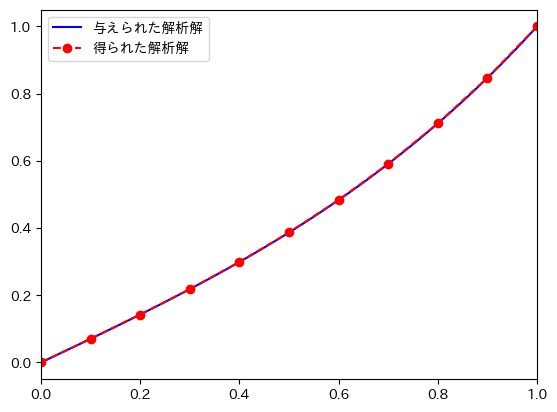

  x | 誤差率 
-------------
0.0 |    nan% 
0.1 | 0.0312% 
0.2 | 0.0300% 
0.3 | 0.0280% 
0.4 | 0.0253% 
0.5 | 0.0220% 
0.6 | 0.0183% 
0.7 | 0.0141% 
0.8 | 0.0096% 
0.9 | 0.0049% 
1.0 | 0.0000% 


<ipython-input-183-fa39dabde12e>:9: RuntimeWarning: invalid value encountered in scalar divide
  return abs(100 * (est - act) / act)


In [183]:
#3-5
import numpy as np
import math
import sympy as sym
import matplotlib.pyplot as plt
import japanize_matplotlib

def error(est, act): #誤差率を求める関数
    return abs(100 * (est - act) / act)

def main():
    y_min = 0
    x_min = 0
    x_max = 1
    y_max = 1

    x_val = np.linspace(0, 1, 11)
    y_val = [y_min]

    n = 9
    h = (x_max - x_min) / (n + 1)

    y = np.array([1]*n, dtype = 'float')

    C = np.zeros((n, n))
    for i in range(0, n):
        for j in range(0, n):
            if i == j:
                C[j, i] = -2.01
            elif i == j - 1:
                C[j, i] = 1
            elif i == j + 1:
                C[j, i] = 1

    unit = np.identity(n)
    b = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, -0.991]

    C = np.hstack([C, unit])

    for k in range(n):
        Ctmp = C[k][k]
        for j in range(2 * n):
            C[k][j] /= Ctmp #正規化
        for i in range(n):
            if i != k:
                Ctmp = C[i][k]
                for j in range(k, 2 * n):
                    C[i][j] = C[i][j] - C[k][j] * Ctmp

    for i in range(n):
        y[i] = 0
        for j in range(n):
            y[i] = y[i] + C[i][n+j] * b[j]
        y_val.append(y[i])

    y_val.append(y_max)

    x = sym.symbols('x')
    expr = (1/2) * (sym.exp(x)-sym.exp(-x)) -x + ((sym.exp(x)-sym.exp(-x)) / (sym.exp(1)-sym.exp(-1))) *((1/2)*(sym.exp(-1)-sym.exp(1))+2)
    expr_func = sym.lambdify(x, expr, "numpy")
    px=np.linspace(0, 1, 100)
    py=expr_func(px)
    plt.plot(px, py, color = "blue", label = r'与えられた解析解')
    plt.plot(x_val, y_val, 'ro--', label = r'得られた解析解')

    plt.xlim(x_min, x_max)

    plt.legend()
    plt.show()

    #誤差率
    px = np.linspace(x_min, x_max, int(x_max/h+1))
    py = expr_func(px)

    print("  x | 誤差率 ")
    print("-------------")
    for i in range(len(py)):
        print(f"{px[i]:.1f}", f"{round(error(py[i], y_val[i]), 4):6.4f}", end = "% \n", sep = " | ")

if __name__ == "__main__":
    main()

#3.6

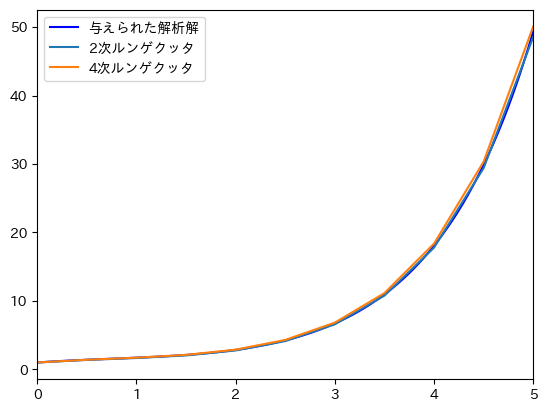

解析解と各アルゴリズムとの局所誤差: 
  x   | 2次ルンゲクッタ | 4次ルンゲクッタ |
-------------------------------------------
0.0   | 0.000000      % | 0.000000      % | 
0.5   | 1.687290      % | 0.008161      % | 
1.0   | 3.127062      % | 0.034986      % | 
1.5   | 3.628758      % | 0.367974      % | 
2.0   | 3.193292      % | 1.031564      % | 
2.5   | 2.452458      % | 1.540151      % | 
3.0   | 1.914575      % | 1.737776      % | 
3.5   | 1.663720      % | 1.721305      % | 
4.0   | 1.594910      % | 1.623664      % | 
4.5   | 1.603704      % | 1.523364      % | 
5.0   | 1.631526      % | 1.449039      % | 


In [141]:
#3-4
import numpy as np
import math
import sympy as sym
import matplotlib.pyplot as plt
import japanize_matplotlib

#2次ルンゲクッタ
def RungeKuttaMethod2(x_val, y_val, z_val, h, x_max, f1, f2, x, y, z):
    i = 0
    while(True):
        ky1 = h * f1.subs([(x, x_val[i]), (y, y_val[i]), (z, z_val[i])])
        kz1 = h * f2.subs([(x, x_val[i]), (y, y_val[i]), (z, z_val[i])])
        ky2 = h * f1.subs([(x, x_val[i] + h/2), (y, y_val[i] + ky1/2), (z, z_val[i] + kz1/2)])
        kz2 = h * f2.subs([(x, x_val[i] + h/2), (y, y_val[i] + ky1/2), (z, z_val[i] + kz1/2)])

        if(x_val[i] >= x_max):
            break

        x_val.append(x_val[i] + h)
        y_val.append(y_val[i] + ky2)
        z_val.append(z_val[i] + kz2)

        i += 1

#4次ルンゲクッタ
def RungeKuttaMethod4(x_val, y_val, z_val, h, x_max, f1, f2, x, y, z):
    i = 0
    while(True):
        ky1 = h * f1.subs([(x, x_val[i]), (y, y_val[i]), (z, z_val[i])])
        kz1 = h * f2.subs([(x, x_val[i]), (y, y_val[i]), (z, z_val[i])])
        ky2 = h * f1.subs([(x, x_val[i] + h/2), (y, y_val[i] + ky1/2), (z, z_val[i] + kz1/2)])
        kz2 = h * f2.subs([(x, x_val[i] + h/2), (y, y_val[i] + ky1/2), (z, z_val[i] + kz1/2)])
        ky3 = h * f1.subs([(x, x_val[i] + h/2), (y, y_val[i] + ky2/2), (z, z_val[i] + kz2/2)])
        kz3 = h * f2.subs([(x, x_val[i] + h/2), (y, y_val[i] + ky2/2), (z, z_val[i] + kz2/2)])
        ky4 = h * f1.subs([(x, x_val[i] + h), (y, y_val[i] + ky2), (z, z_val[i] + kz3)])
        kz4 = h * f2.subs([(x, x_val[i] + h), (y, y_val[i] + ky3), (z, z_val[i] + kz3)])

        if(x_val[i] >= x_max):
            break

        x_val.append(x_val[i] + h)
        y_val.append(y_val[i] + (1/6) * (ky1 + 2*ky2 + 2*ky3 + ky4))
        z_val.append(z_val[i] + (1/6) * (kz1 + 2*kz2 + 2*kz3 + kz4))

        i += 1

def error(est, act): #誤差率を求める関数
    return abs(100 * (est - act) / act)

def main():
    x_val = [[0], [0]]
    y_val = [[1], [1]]
    z_val = [[1], [1]]
    h = 0.5
    x_max = 5
    x_min = 0
    x = sym.symbols("x")
    y = sym.symbols("y")
    z = sym.symbols("z")
    f1 = z
    f2 = sym.exp(x) - y - z
    RungeKuttaMethod2(x_val[0], y_val[0], z_val[0], h, x_max, f1, f2, x, y, z)
    RungeKuttaMethod4(x_val[1], y_val[1], z_val[0], h, x_max, f1, f2, x, y, z)

    #グラフ
    x=sym.symbols('x')
    expr=(2/3) * (sym.exp(-x/2)) * ( sym.cos((sym.sqrt(3)*x)/2) + sym.sqrt(3)*sym.sin((sym.sqrt(3)*x)/2) ) + sym.exp(x)/3
    expr_func=sym.lambdify(x,expr,"numpy")
    px=np.linspace(0,5,100)
    py=expr_func(px)

    plt.plot(px, py, color = "blue", label = '与えられた解析解')
    plt.plot(x_val[0], y_val[0], label = '2次ルンゲクッタ')
    plt.plot(x_val[1], y_val[1], label = '4次ルンゲクッタ')

    plt.xlim(0, 5)

    #近似曲線
    plt.legend()
    plt.show()

    #局所誤差
    px = np.linspace(x_min, x_max, int(x_max/h+1))
    py = expr_func(px)
    print("解析解と各アルゴリズムとの局所誤差: ")
    print("  x   | 2次ルンゲクッタ | 4次ルンゲクッタ |")
    print("-------------------------------------------")
    for i in range(len(py)):
        print(f"{px[i]: <5.1f}", end = " | ")
        for j in range(len(y_val)):
            print(f"{error(py[i], y_val[j][i]):<14.6f}", end = "% | ")
        print()

if __name__ == "__main__":
    main()

#3.7

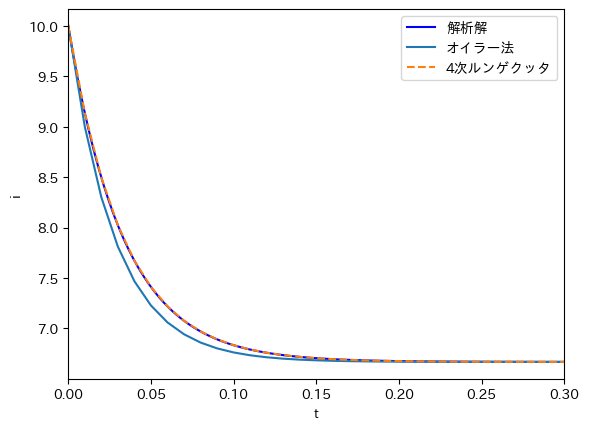

解析解と各アルゴリズムとの局所誤差: 
  t   |   オイラー法    | 4次ルンゲクッタ |
-------------------------------------------
0.00  | 0.000000      % | 0.000000      % | 
0.01  | 1.511786      % | 0.000703      % | 
0.02  | 2.361913      % | 0.001121      % | 
0.03  | 2.713174      % | 0.001319      % | 
0.04  | 2.727298      % | 0.001363      % | 
0.05  | 2.539593      % | 0.001306      % | 
0.06  | 2.250132      % | 0.001192      % | 
0.07  | 1.925807      % | 0.001051      % | 
0.08  | 1.607172      % | 0.000903      % | 
0.09  | 1.316042      % | 0.000762      % | 
0.10  | 1.061978      % | 0.000632      % | 
0.11  | 0.847120      % | 0.000518      % | 
0.12  | 0.669488      % | 0.000421      % | 
0.13  | 0.525107      % | 0.000339      % | 
0.14  | 0.409279      % | 0.000271      % | 
0.15  | 0.317319      % | 0.000216      % | 
0.16  | 0.244916      % | 0.000171      % | 
0.17  | 0.188303      % | 0.000134      % | 
0.18  | 0.144291      % | 0.000106      % | 
0.19  | 0.110241      % | 0.000083      % | 
0.20

In [182]:
#3-7
import numpy as np
import math
import sympy as sym
import matplotlib.pyplot as plt
import japanize_matplotlib

#オイラー法
def EulerMethod(t_val, i_val, h, t_max, f, t, i):
    j = 0
    while(True):
        if(t_val[j] >= t_max):
            break
        i_val.append(i_val[j] + h * f.subs([(t, t_val[j]), (i, i_val[j])]))
        t_val.append(t_val[j] + h)
        j += 1

#4次ルンゲクッタ
def RungeKuttaMethod4(t_val, i_val, h, t_max, f, t, i):
    j = 0
    while(True):
        k1 = h * f.subs([(t, t_val[j]), (i, i_val[j])])
        k2 = h * f.subs([(t, t_val[j] + h/2), (i, i_val[j] + k1/2)])
        k3 = h * f.subs([(t, t_val[j] + h/2), (i, i_val[j] + k2/2)])
        k4 = h * f.subs([(t, t_val[j] + h), (i, i_val[j] + k3)])

        if(t_val[j] >= t_max):
            break

        i_val.append(i_val[j] + (k1 + 2*k2 + 2*k3 + k4)/6)
        t_val.append(t_val[j] + h)

        j += 1

def error(est, act): #誤差率を求める関数
    return abs(100 * (est - act) / act)

def main():
    E = 100
    R = 15
    r = 10
    L = 500e-3
    t_val = [[0], [0]]
    i_val = [[E/r], [E/r]]
    h = 0.01
    t_max = 0.3
    t_min = 0
    t = sym.symbols("t")
    i = sym.symbols("i")
    f = (E - (R * i)) / L
    EulerMethod(t_val[0], i_val[0], h, t_max, f, t, i)
    RungeKuttaMethod4(t_val[1], i_val[1], h, t_max, f, t, i)

    #グラフ
    at=sym.symbols('at')
    expr=E/R + (E/r - E/R) * sym.exp(-R*at/L)
    expr_func=sym.lambdify(at,expr,"numpy")
    px=np.linspace(t_min,t_max, 100)
    py=expr_func(px)

    plt.plot(px,py,color="blue",label=r'解析解')
    plt.plot(t_val[0],i_val[0],label=r'オイラー法')
    plt.plot(t_val[1],i_val[1],"--",label=r'4次ルンゲクッタ')

    plt.xlabel("t")
    plt.ylabel("i")

    plt.xlim(t_min, t_max)

    plt.legend()
    plt.show()

    #局所誤差
    px = np.linspace(t_min, t_max, int(t_max/h+1))
    py = expr_func(px)
    print("解析解と各アルゴリズムとの局所誤差: ")
    print("  t   |   オイラー法    | 4次ルンゲクッタ |")
    print("-------------------------------------------")
    for i in range(len(py)):
        print(f"{px[i]: <5.2f}", end = " | ")
        for j in range(len(i_val)):
            print(f"{error(py[i], i_val[j][i]):<14.6f}", end = "% | ")
        print()

if __name__ == "__main__":
    main()